In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

onefig_size = (10,4)
multifigs_size = (12,4)

## Dataset Overview

Dataset includes 1338 observations on 7 variables:

*   `age`: age of the insured person.
*   `sex`: gender of the insured person; `male` or `female`.
*   `bmi`: body mass index, computed by the height ($kg$) / weight ($m^2$) ratio.
*   `children`: number of children covered by health insurance.
*   `smoker`: does the insured person smoke or not; `yes` or `no`.
*   `region`: the insured person's area in the United States; `northeast`, `southeast`, `southwest`, `northwest`.
*   `charges`: the medical costs billed by health insurance.


In [2]:
original_df = pd.read_csv('insurance.csv')
original_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Information of insurance medical cost dataset:

In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see that `sex`, `smoker`, `region` are categorical variables, but not `children`, let's print out its unique values:



In [4]:
set(original_df['children'])

{0, 1, 2, 3, 4, 5}

The values of `children` are around from 0 to 5, certainly it's a categorical variable, so we'll convert it:

In [5]:
original_df['children'] = original_df['children'].astype('object')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


Next, let's find out more information about the numerical variables as `age`, `bmi` in the below table:

In [6]:
original_df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


*   `age` has a range from 18 to 64 years old. 
*   `charges` has the average medical cost is about \$13,270 with a median value of \$9382.

## Data Integration

Because the dataset is ingested from only one source, so that we'll skip this step.

## Data Cleaning


Clone a copy of the original dataset to keep it saparated.

In [7]:
df = original_df.copy()

### Data Duplication

Firstly, we'll find whether the dataset has any duplication:

In [8]:
dup_ind = df.duplicated()
df[dup_ind]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


There's only one duplication, let's drop it:

In [9]:
df = df[dup_ind==False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   object 
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 83.6+ KB


### Missing Data

Let's check the percent of missing data:

In [10]:
df.isnull().sum()*100/df.shape[0]

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

So there's no missing data in the dataset, hence it's cleaned.

Next, we'll do EDA step to explore and analyze the dataset to get more knowledge.

## Exploratory Data Analysis

The cleaned dataset has total of 1337 observations, included:

*    Categorical variables: `sex`, `children`, `smoker`, `region`
*    Numerical variables: `age`, `bmi`, `charges`

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   object 
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 83.6+ KB


To visualize the numerical variables, we'll turn them into categorical variables.

First, for `age`, accroding from [Age Categories, Life Cycle Groupings](https://www.statcan.gc.ca/eng/concepts/definitions/age2), we'll consider a `age_groups` below:
*    Children: below 15
*    Youth: from 15 - 24
*    Adult: from 25 - 64
*    Senior: above 64

In [12]:
def categorize_age(row):
  if row["age"] < 15:
    label = "children"
  elif row["age"] < 24:
    label = "youth"
  elif row["age"] < 64:
    label = "adult"
  else:
    label = "senior"
  return label

df['age_groups'] = df.apply(categorize_age, axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_groups
0,19,female,27.900,0,yes,southwest,16884.92400,youth
1,18,male,33.770,1,no,southeast,1725.55230,youth
2,28,male,33.000,3,no,southeast,4449.46200,adult
3,33,male,22.705,0,no,northwest,21984.47061,adult
4,32,male,28.880,0,no,northwest,3866.85520,adult


Then, for `bmi`, accroding [About Adult BMI](https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html), we'll consider a `bmi_groups` below:

*    Underweight: BMI $<$ 18.5
*    Normal/Healthy: 18.5 $\leq$ BMI $<$ 25
*    Overweight: 25 $\leq$ BMI $<$ 30
*    Obese: BMI $\geq$ 30

In [13]:
def categorize_bmi(row):
  if row["bmi"] < 18.5:
    label = "underweight"
  elif row["bmi"] < 25:
    label = "healthy"
  elif row["bmi"] < 30:
    label = "overweight"
  else:
    label = "obesity"
  return label

df['bmi_groups'] = df.apply(categorize_bmi, axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,age_groups,bmi_groups
0,19,female,27.900,0,yes,southwest,16884.92400,youth,overweight
1,18,male,33.770,1,no,southeast,1725.55230,youth,obesity
2,28,male,33.000,3,no,southeast,4449.46200,adult,obesity
3,33,male,22.705,0,no,northwest,21984.47061,adult,healthy
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight


Next, we'll observe the distribution of prediction variable `charges`.

### Prediction Variable

We'll plot distribution of `charges`:

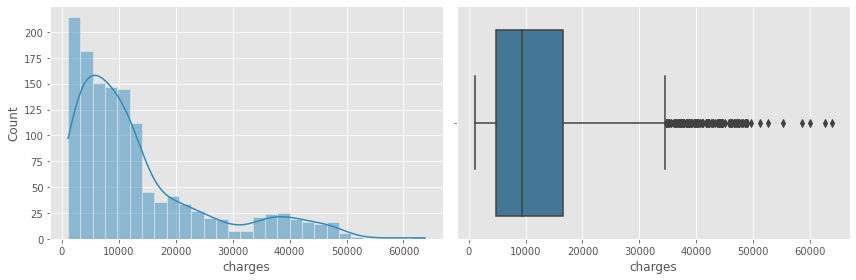

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(df['charges'], kde = True, stat='count', ax=axs[0], palette='mako')
sns.boxplot(df['charges'], ax=axs[1], palette='mako')
plt.tight_layout()

This `charges` distribution is right-skewed, we cannot check the presence of outliers from this box plot. So we will apply log to centralize the distribution.

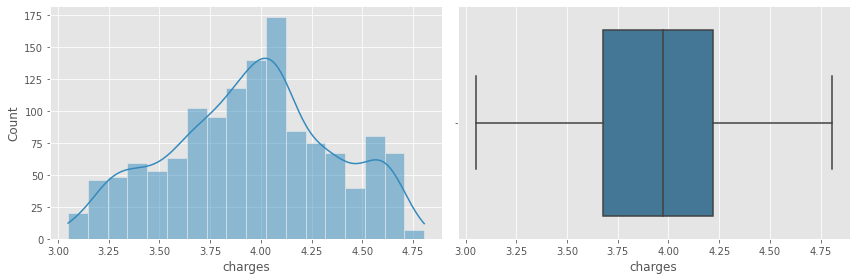

In [15]:
fig, axs = plt.subplots(ncols=2, figsize=multifigs_size)
sns.histplot(np.log10(df['charges']), kde = True, stat='count', ax=axs[0], palette='mako')
sns.boxplot(np.log10(df['charges']), ax=axs[1], palette='mako')
plt.tight_layout()

As we can see, we can assume that there's no outliers in this dataset.

Next, let's analyze the categorical variables.

### Categorical Variables

Extract dataset with categorical variables for data visualizaion

In [16]:
cat_df = df.select_dtypes(include="object").copy()
cat_df.head()

,sex,children,smoker,region,age_groups,bmi_groups
0,female,0,yes,southwest,youth,overweight
1,male,1,no,southeast,youth,obesity
2,male,3,no,southeast,adult,obesity
3,male,0,no,northwest,adult,healthy
4,male,0,no,northwest,adult,overweight


Categorical variables view with bar charts:

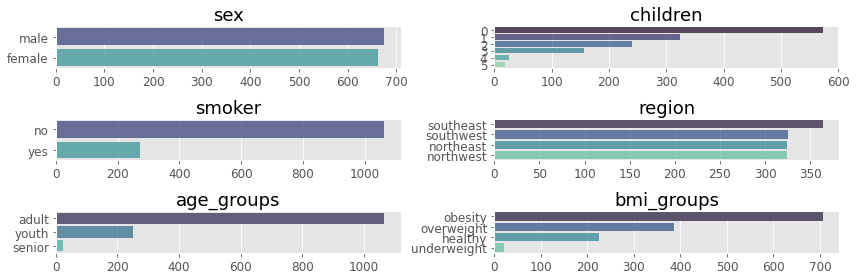

In [17]:
num_plot = len(cat_df.columns)
num_cols = min(num_plot, 2)
num_rows = int(num_plot / num_cols) + (1 if num_plot % num_cols != 0 else 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=multifigs_size)

if isinstance(axes, np.ndarray):
  list_axes = list(axes.flat)
else:
  list_axes = [axes]

for index, col in enumerate(cat_df.columns):
  df_count = df[col].value_counts()

  if (df_count.index.dtype == np.int64):
    df_count.index = map(str, df_count.index)

  sns.barplot(ax = list_axes[index] , x = df_count.values, y = df_count.index , alpha=0.8, palette='mako')
  list_axes[index].set_title(col, fontsize=18)
  list_axes[index].tick_params(axis="x", labelsize=12)
  list_axes[index].tick_params(axis="y", labelsize=12)


for i in range(num_plot, len(list_axes)):
  list_axes[i].set_visible(False)


fig.tight_layout()
plt.show()

Frequency of categorical variables:

In [18]:
for col in cat_df.columns:
  temp_df = df[col].value_counts().rename_axis(col).reset_index(name='counts')
  temp_df["frequency"] = round(temp_df["counts"]/len(df) * 100, 2)
  print(temp_df)

      sex  counts  frequency
0    male     675      50.49
1  female     662      49.51
   children  counts  frequency
0         0     573      42.86
1         1     324      24.23
2         2     240      17.95
3         3     157      11.74
4         4      25       1.87
5         5      18       1.35
  smoker  counts  frequency
0     no    1063      79.51
1    yes     274      20.49
      region  counts  frequency
0  southeast     364      27.23
1  southwest     325      24.31
2  northeast     324      24.23
3  northwest     324      24.23
  age_groups  counts  frequency
0      adult    1066      79.73
1      youth     249      18.62
2     senior      22       1.65
    bmi_groups  counts  frequency
0      obesity     706      52.80
1   overweight     386      28.87
2      healthy     225      16.83
3  underweight      20       1.50


**Observations**:

- The data of `sex` and `region` is quite balanced.
- 66% of recipients have at most 1 child, 28% have from 2-3 children.
- Most of the recipients are adults.
- BMI shows that most of the recipients had obesity.
- 80% of people are non-smokers.

About `age`, from the fig below, the number of seniors in the  is the lowest, but their sum and average of medical cost are the highest.

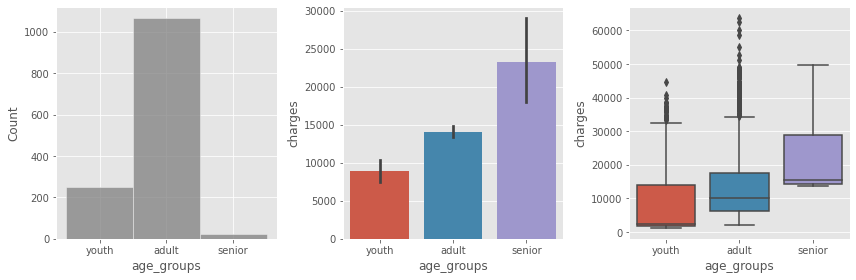

In [19]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='age_groups', data=df, ax=axs[0], color='grey')
sns.barplot(x='age_groups', y='charges', data=df, ax=axs[1])
sns.boxplot(x='age_groups', y='charges', data=df, ax=axs[2])
plt.tight_layout()

About `sex`, it's interested that male and female are equally, also sum and average of the medical cost.

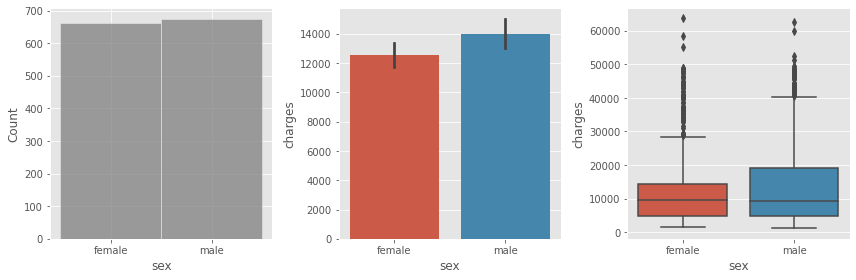

In [20]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='sex', data=df, ax=axs[0], color='grey')
sns.barplot(x='sex', y='charges', data=df, ax=axs[1])
sns.boxplot(x='sex', y='charges', data=df, ax=axs[2])
plt.tight_layout()

About `smoker`, we can see the contrast between number of smokers and their cost.

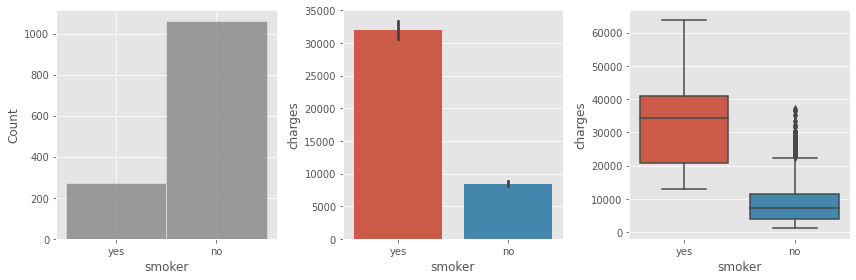

In [21]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='smoker', data=df, ax=axs[0], color='grey')
sns.barplot(x='smoker', y='charges', data=df, ax=axs[1])
sns.boxplot(x='smoker', y='charges', data=df, ax=axs[2])
plt.tight_layout()

About `bmi`, most of recipients had obesity, as the result, their cost also high.

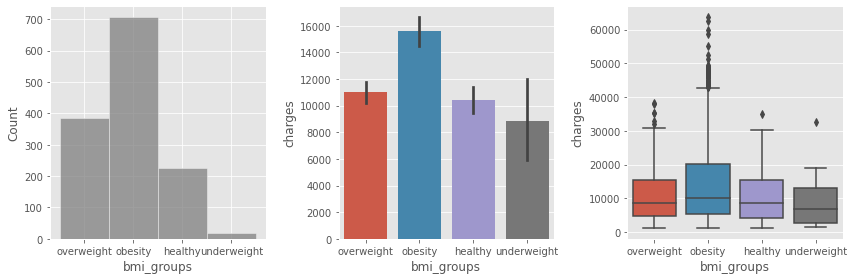

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='bmi_groups', data=df, ax=axs[0], color='grey')
sns.barplot(x='bmi_groups', y='charges', data=df, ax=axs[1])
sns.boxplot(x='bmi_groups', y='charges', data=df, ax=axs[2])
plt.tight_layout()

About `region`, the distribution and average of charges are also equally.

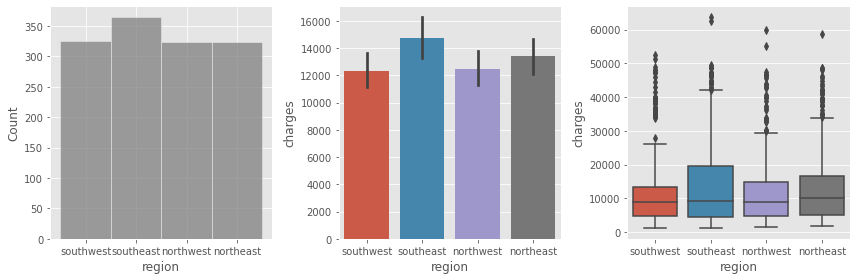

In [23]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='region', data=df, ax=axs[0], color='grey')
sns.barplot(x='region', y='charges', data=df, ax=axs[1])
sns.boxplot(x='region', y='charges', data=df, ax=axs[2])
plt.tight_layout()

About `children`, the distribution is descending, but the average of charges are quite equal.

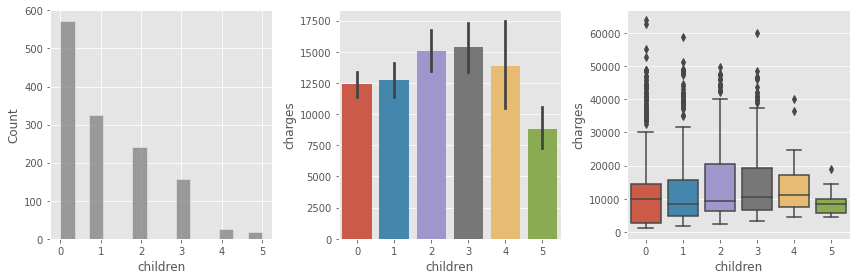

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.histplot(x='children', data=df, ax=axs[0], color='grey')
sns.barplot(x='children', y='charges', data=df, ax=axs[1])
sns.boxplot(x='children', y='charges', data=df, ax=axs[2])
plt.tight_layout()

**Conclusion**

- In the same age group, the older person is, the higher cost they had to spend.
- Medical cost doesn't seem to be affected by gender (`sex`) or `region`.
- On the other hand, `smoker`, `bmi` and `age` may have some influence on `charges`. 

Next, we'll visualize more information from the categorical variables.

### Data Visualization

#### Correlation matrix

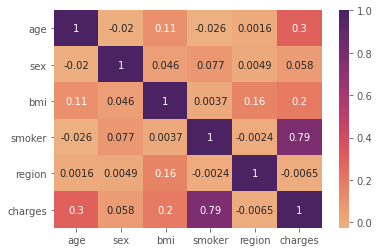

In [25]:
from sklearn.preprocessing import LabelEncoder

df_transform = df.copy()

label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df_transform.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df_transform.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df_transform.region = label.transform(df.region)

corr_matrix = df_transform.corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare')
plt.show()

The variables most correlated with the `charges` are `smoker`, `age` and `bmi`. We'll visualize them on the same figures.

#### Variable `age`, `bmi` with `smoker`

Let's analyze the medical cost by `age`, `bmi` and `children` according to the `smoker` factor

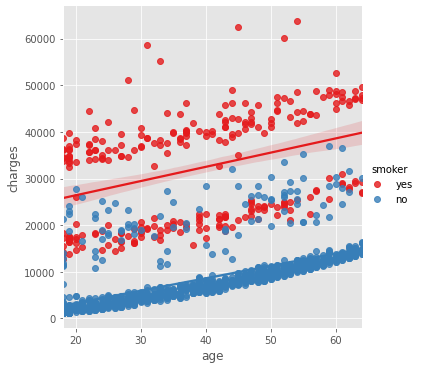

In [26]:
sns.lmplot(x='age', y='charges', data=df, hue='smoker', palette='Set1')

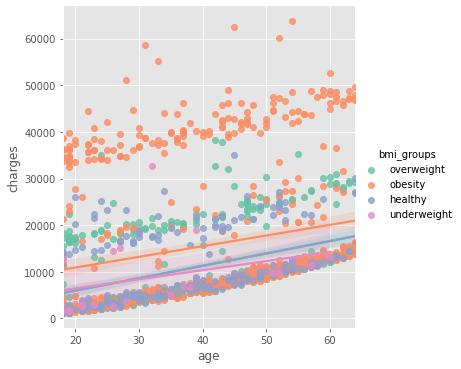

In [27]:
sns.lmplot(x='age', y='charges', data=df, hue='bmi_groups', palette='Set2')

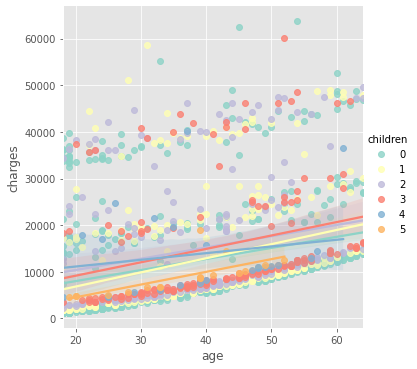

In [28]:
sns.lmplot(x = 'age', y = 'charges', data=df, hue='children', palette='Set3')

**Observations**:

From the above figs, the relationship between `age`, `bmi` and `smoker` with `charges` can be splitted into 3 groups below:

- Group 1: The lowest medical cost is made by non-smokers and most healthy people, some overweight/underweight people.
- Group 2: The middle medical cost is about between the smokers and non-obese people.
- Group 3: The highest medical cost is charged by the smokers and obese people.

We can see that the smokers appears mostly are adults and seniors, and the medical cost are usually high for the smokers.

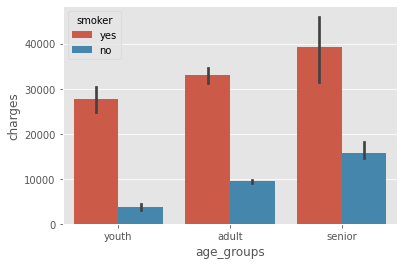

In [29]:
sns.barplot(x='age_groups', y='charges', hue='smoker', data=df)

Also with the higher `bmi`, the smokers have to spend expensively medical cost.

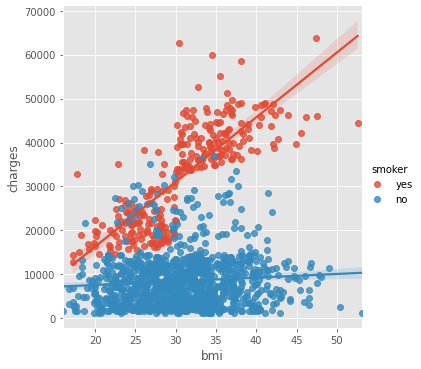

In [30]:
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = df)

**Conclusion**

- To the non-smokers, it doesn't matter how much the medical cost they spend.
- The smokers have to spend as more as they have obese symptoms.

We can also splitted into the three groups which mentioned above.

#### Variable `sex` with `smoker`

Let's see whether `smoker` and `sex` have any relationship to medical cost?

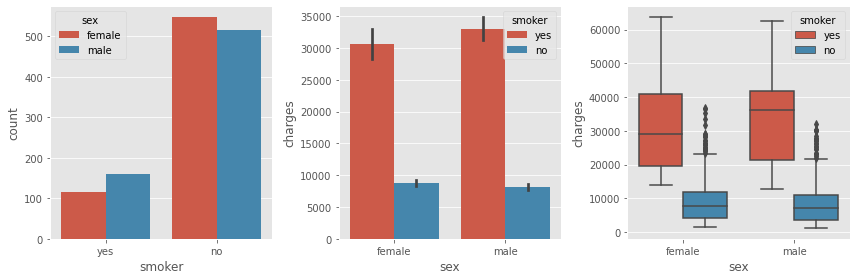

In [31]:
fig, axs = plt.subplots(ncols=3, figsize=multifigs_size)
sns.countplot(x='smoker', hue='sex', data=df, ax=axs[0])
sns.barplot(x='sex', y='charges', hue='smoker', data=df, ax=axs[1])
sns.boxplot(x='sex', y='charges', hue='smoker', data=df, ax=axs[2])
plt.tight_layout()

**Conclusion**

The males smokes more than the females, which also made their medical cost higher.

#### Variable `region` with `sex`, `smoker`, `children`

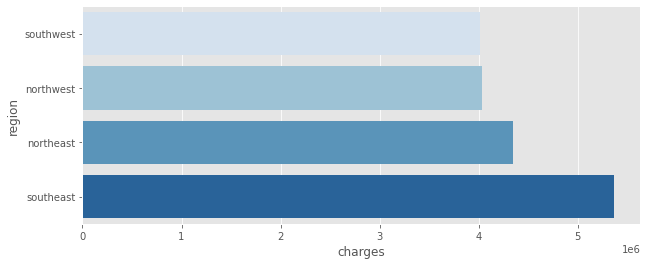

In [32]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=onefig_size)
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children), let's see how it changes by region.

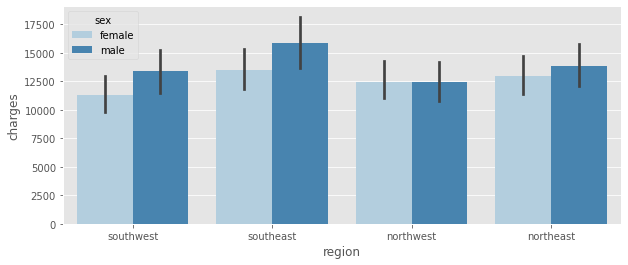

In [33]:
f, ax = plt.subplots(1, 1, figsize=onefig_size)
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='Blues')

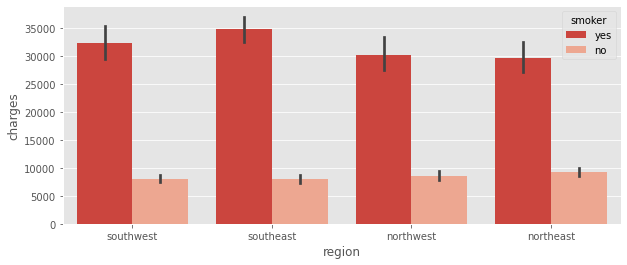

In [34]:
f, ax = plt.subplots(1,1, figsize=onefig_size)
ax = sns.barplot(x='region', y='charges', hue='smoker', data=df, palette='Reds_r')

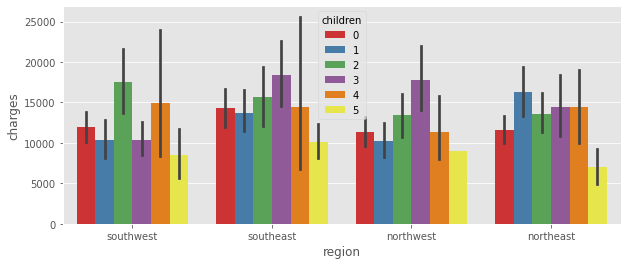

In [35]:
f, ax = plt.subplots(1, 1, figsize=onefig_size)
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.

#### Variable `children` with `smoker`

Smoking has the highest impact on medical costs, even though the costs are growing with `age`, `bmi` and `children`. Also people who have children generally smoke less, which the following barplot shows below

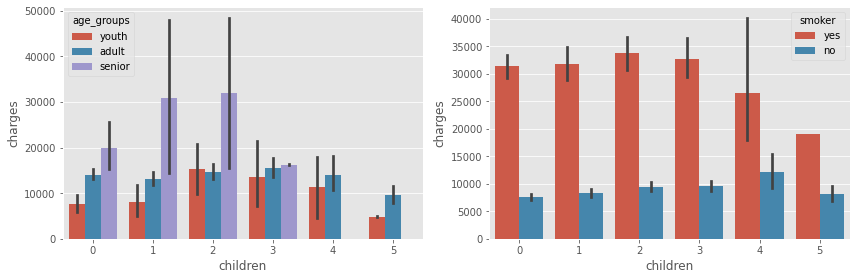

In [36]:
f, axs = plt.subplots(ncols=2, figsize=multifigs_size)
ax = sns.barplot(x='children', y='charges', data=df, hue='age_groups', ax=axs[0])
ax = sns.barplot(x='children', y='charges', data=df, hue='smoker', ax=axs[1])
plt.tight_layout()

## Feature Engineering

Depend on the EDA, we can create a feature called `health_groups` which included values:
* `non-smokers`: presents for group 1
* `non-obese smokers`: presents for group 2
* `obese smokers`: presents for group 3

In [37]:
df_fe = df.copy()

def categorize_health(row):
  if row["smoker"] == "yes" and row["bmi_groups"] == "obesity":
    label = "obese smoker"
  elif row['smoker'] == "yes" and row["bmi_groups"] != "obesity":
    label = "non-obese smoker"
  else:
    label="non-smoker"
  return label

df_fe['health_groups'] = df_fe.apply(categorize_health, axis=1)
df_fe.head()

,age,sex,bmi,children,smoker,region,charges,age_groups,bmi_groups,health_groups
0,19,female,27.900,0,yes,southwest,16884.92400,youth,overweight,non-obese smoker
1,18,male,33.770,1,no,southeast,1725.55230,youth,obesity,non-smoker
2,28,male,33.000,3,no,southeast,4449.46200,adult,obesity,non-smoker
3,33,male,22.705,0,no,northwest,21984.47061,adult,healthy,non-smoker
4,32,male,28.880,0,no,northwest,3866.85520,adult,overweight,non-smoker


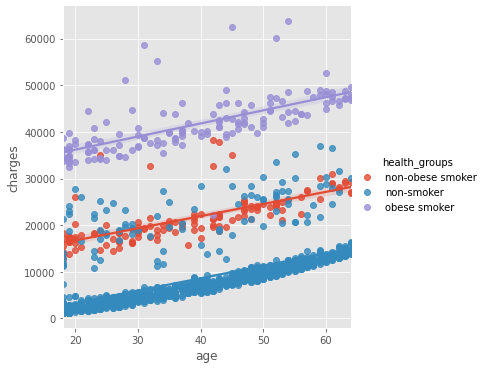

In [38]:
sns.lmplot(x='age', y='charges', hue='health_groups', data=df_fe)

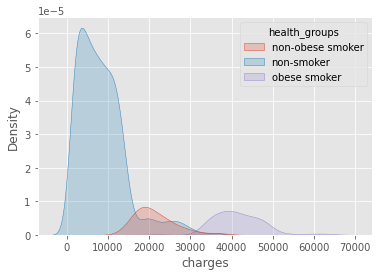

In [39]:
sns.kdeplot(x='charges', hue='health_groups', data=df_fe, shade=True)

## Experiment



### Prepare Train Test Dataset 

Split train/test with ratio $8:2$

In [40]:
from sklearn.model_selection import train_test_split

df = df_fe.copy()
category_names = ['sex', 'smoker', 'region', 'children', 'age_groups', 'bmi_groups', 'health_groups']
df[category_names] = df[category_names].astype('category')

X = df.drop("charges", axis=1)
y = df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Details of train dataset

In [41]:
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

train.head()

,age,sex,bmi,children,smoker,region,age_groups,bmi_groups,health_groups,charges
1114,23,male,24.510,0,no,northeast,youth,healthy,non-smoker,2396.09590
968,21,male,25.745,2,no,northeast,youth,overweight,non-smoker,3279.86855
599,52,female,37.525,2,no,northwest,adult,obesity,non-smoker,33471.97189
170,63,male,41.470,0,no,southeast,adult,obesity,non-smoker,13405.39030
275,47,female,26.600,2,no,northeast,adult,overweight,non-smoker,9715.84100


### Choose Models and Scalers

The regression models are chosen:
- `LinearRegression`
- `Ridge`
- `KNeighborsRegressor`
- `DecisionTreeRegressor`
- `RandomForestRegressor`

In [42]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

clf_names = ["LinearRegression", "RidgeRegression", "KNeighborsRegressor", "DecisionTreeRegressor", "RandomForestRegressor"]
clfs = [LinearRegression(), Ridge(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor()]

The scalers are chosen:
- `StandardScaler`
- `MinMaxScaler`
- `Normalizer`
- `RobustScaler`

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

sc_names = ["StandardScaler", "MinMaxScaler", "Normalizer", "RobustScaler"]
scs = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler()]

### Setup Pipeline

Create pipeline:

1.   Apply `StandardScaler` on numeric variables and `OrdinalEncoder` on categorical variables (Feature Scaling, Encoding).
2.   Apply Feature Scaling with the four scalers: `StandardScaler`, `MinMaxScaler`, `Normalizer`, `RobustScaler` (Feature Scaling).
3.   Choose $k=6$ best/importance features over total $8$ using `SelectKBest` (Importance Features).
4.   Predict with the five regression models: `LinearRegression`, `Ridge`, `KNeighborsRegressor`, `DecisionTreeRegressor`, `RandomForestRegressor`.
5.   Evaluate model based on the two metrics: $RMSE$ (Root Mean Squared Error), $R^2$ score.

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OrdinalEncoder

numerics = X_train.select_dtypes(exclude="category")
categoricals = X_train.select_dtypes(include="category")

numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numerics.columns.to_list())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline =  Pipeline([
    ("select_categoricals", DataFrameSelector(categoricals.columns.to_list())),
    ("label_encoder", OrdinalEncoder()),
])

def apply_pipeline(scaler, regressor):
  return Pipeline([
    ('features', FeatureUnion(transformer_list=[
        ('num_pipeline', numerical_pipeline),
        ('cat_pipeline', categorical_pipeline)
    ])),
    ('scaler', scaler),
    ('kbest', SelectKBest(f_regression, k=len(X_train.columns)-2)),                      
    ('regressor', regressor)
  ]) 

Evaluate model with Root Mean Square Error, $R^2$

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

def compute_rmse(model, X, y):
  y_pred = model.predict(X)
  return np.sqrt(mean_squared_error(y, y_pred))

def compute_rsquared(model, X, y):
  y_pred = model.predict(X)
  return r2_score(y, y_pred, y)

### Apply Pipeline

In [47]:
result = []
importance_features = []
importance_feature_values = []
for clf_name, clf in zip(clf_names, clfs):
  for sc_name, sc in zip(sc_names, scs):
    pipe = apply_pipeline(scaler=sc, regressor=clf)
    model_fit = pipe.fit(X_train, y_train)

    train_rmse = compute_rmse(model_fit, X_train, y_train)
    test_rmse = compute_rmse(model_fit, X_test, y_test)
    
    train_rsquared = compute_rsquared(model_fit, X_train, y_train)
    test_rsquared = compute_rsquared(model_fit, X_test, y_test)

    result.append((clf_name, sc_name, train_rmse, test_rmse, train_rsquared, test_rsquared))

    kbest = pipe.named_steps['kbest'].get_support()
    importance_features.append([clf_name, sc_name] + list(map(bool, kbest)))

    temp_if_values = None
    clf_root = pipe.named_steps['regressor']
    try:
      temp_if_values = list(map(str, clf_root.feature_importances_))
    except Exception as e:
      try: 
        temp_if_values = list(map(str, clf_root.coef_))
      except Exception as e:
        pass
    
    if temp_if_values:
      temp_series = pd.Series(data=list(map(bool, kbest)))
      temp_series[temp_series==True] = temp_if_values
      temp_series[temp_series==False] = 'Omitted'
      importance_feature_values.append([clf_name, sc_name] + temp_series.to_list())

## Results

In [48]:
df_result = pd.DataFrame(data=result, columns=["Classifier","Scaler","Train RMSE", "Test RMSE","Train R2", "Test R2"]).sort_values('Test RMSE')
df_result

,Classifier,Scaler,Train RMSE,Test RMSE,Train R2,Test R2
1,LinearRegression,MinMaxScaler,4545.754407,4250.773725,0.806898,0.860134
0,LinearRegression,StandardScaler,4545.754407,4250.773725,0.806898,0.860134
3,LinearRegression,RobustScaler,4545.754407,4250.773725,0.806898,0.860134
4,RidgeRegression,StandardScaler,4545.767946,4251.990529,0.806926,0.859993
7,RidgeRegression,RobustScaler,4546.149500,4259.808583,0.807014,0.859240
5,RidgeRegression,MinMaxScaler,4547.160907,4261.471734,0.806956,0.858706
11,KNeighborsRegressor,RobustScaler,4213.959121,4683.410213,0.849012,0.852583
8,KNeighborsRegressor,StandardScaler,4147.422291,4709.330538,0.853877,0.844814
9,KNeighborsRegressor,MinMaxScaler,4089.413352,4715.673258,0.860143,0.846742
17,RandomForestRegressor,MinMaxScaler,1879.810194,4792.853324,0.970917,0.856512


The above table shown best result is about $83\%$ with the chosen model is `LinearRegression` and chosen scaler is `MinMaxScaler`. 

Let's dig in the importance features table:

In [49]:
if_headers = ["Classifier", "Scaler"] + X_train.columns.to_list()
df_if_values = pd.DataFrame(data=importance_feature_values, columns=if_headers)
df_if_values

,Classifier,Scaler,age,sex,bmi,children,smoker,region,age_groups,bmi_groups,health_groups
0,LinearRegression,StandardScaler,4023.9039708235637,234.70275883536533,-216.91721813942112,785.9985840057709,9199.990395377294,Omitted,651.0237544079511,Omitted,4309.663323849996
1,LinearRegression,MinMaxScaler,13228.91567129681,1442.203158892414,-434.0169670222718,3291.0001279955104,22991.91446492521,Omitted,1679.7833381356381,Omitted,19264.391937457338
2,LinearRegression,Normalizer,12080.56481873117,4271.661708278345,Omitted,7003.99339329993,80478.75630154012,Omitted,6925.83194001726,-1776.0823822339196,29571.380972711628
3,LinearRegression,RobustScaler,6902.042958937461,320.10158893900064,-434.01696702225865,1316.4000511982074,22991.91446492518,Omitted,839.891669067822,Omitted,9632.195968728665
4,RidgeRegression,StandardScaler,4016.9110975577755,236.60929980696727,-215.9551760314181,784.8420488166843,9191.268173459921,Omitted,646.4465377520961,Omitted,4305.088018413897
5,RidgeRegression,MinMaxScaler,12996.10932284325,1616.2231248710261,-418.6785648795201,3217.604748895269,22856.227296975085,Omitted,1564.420366344136,Omitted,18872.122276187136
6,RidgeRegression,Normalizer,11697.72806146999,4353.354226525378,Omitted,6383.454063383404,74669.64171316785,Omitted,5946.944420728799,-2175.1041363254644,26957.651137264682
7,RidgeRegression,RobustScaler,6867.239435264656,332.0066148220651,-422.3683361164739,1312.4330805975235,22856.73033624635,Omitted,825.9181020578246,Omitted,9580.694695548636
8,DecisionTreeRegressor,StandardScaler,0.13071969812158554,0.08970135271065988,0.010844267358441224,0.024480462086859344,0.1051179200189149,Omitted,0.0011469492433281573,Omitted,0.637989350460211
9,DecisionTreeRegressor,MinMaxScaler,0.13271218340860816,0.09392856751629167,0.006441189212808606,0.02354526367239742,0.10511792001891512,Omitted,0.0002655257107680524,Omitted,0.6379893504602111


We can notice that:
- The coefficent of `smoker` is usually the highest.
- The runner-up is the feature engineering `health_groups`.
- The last one is `age`.


**Conclusion**
- These three (`smoker`, `health_groups`, `age`) of six best features have affect to medical cost much.
- Model `LinearRegression` with `MinMaxScaler` may give the better result.
